# Probabilidad

La probabilidad afecta a cada aspecto de nuestras vidas, pero en realidad, todos somos bastante malos en ello, como demuestran algunos de los ejemplos en este capítulo. Necesitamos estudiar la probabilidad para hacerlo bien. Y necesitamos hacerlo bien porque el aprendizaje profundo trata extensamente con ideas de la teoría de la probabilidad. La probabilidad aparece en todas partes, desde las salidas de las redes neuronales hasta la frecuencia con la que aparecen diferentes clases en la naturaleza hasta las distribuciones utilizadas para inicializar redes profundas.

Este capítulo tiene como objetivo exponerte a los tipos de ideas y términos relacionados con la probabilidad que encontrarás con frecuencia en el aprendizaje profundo. Comenzaremos con ideas básicas sobre probabilidad e introduciremos la noción de una variable aleatoria. Luego pasaremos a las reglas de la probabilidad. Estas secciones cubren los conceptos básicos que nos permitirán hablar sobre probabilidades conjuntas y marginales. Encontrarás esos términos una y otra vez mientras exploras el aprendizaje profundo. Una vez que entiendas cómo usar las probabilidades conjuntas y marginales, explicaré la primera de las dos reglas de la cadena discutidas en este libro. La segunda está en el Capítulo 6 sobre cálculo diferencial. Continuaremos nuestro estudio de la probabilidad en el Capítulo 3.

## Conceptos básicos

Una _probabilidad_ es un número entre 0 y 1 que mide qué tan probable es que ocurra algo. Si no hay posibilidad de que algo suceda, su probabilidad es 0. Si es absolutamente cierto que sucederá, su probabilidad es 1. Usualmente expresamos las probabilidades de esta manera, aunque en el uso cotidiano, a las personas parecen no gustarles decir cosas como "La probabilidad de lluvia mañana es 0.25". En cambio, decimos "La probabilidad de lluvia mañana es del 25%". En el habla cotidiana, convertimos la probabilidad fraccional a un porcentaje. Haremos lo mismo en este capítulo.

El párrafo anterior utilizó múltiples palabras asociadas con probabilidad: probable, chance y certeza. Esto está bien en el uso informal, e incluso en cierto modo en el aprendizaje profundo, pero cuando necesitamos ser explícitos, nos adheriremos a la probabilidad y la expresaremos numéricamente en el rango de 0 a 1, [0, 1]. Los corchetes cuadrados significan que el límite superior e inferior están incluidos. Si el límite no está incluido en el rango, se utiliza un paréntesis normal. Por ejemplo, la función np.random.random() de NumPy devuelve un número de punto flotante seudorandom en el rango [0, 1). Por lo tanto, podría devolver exactamente 0, pero nunca devolverá exactamente 1.

A continuación, introduciré los conceptos fundamentales de espacio muestral, eventos y variables aleatorias. Concluiré con algunos ejemplos de cómo los humanos son malos en probabilidad.

### Espacio muestral y eventos

En pocas palabras, un espacio muestral es un conjunto discreto o un rango continuo que representa todos los posibles resultados de un evento. Un evento es algo que sucede. Por lo general, es el resultado de algún proceso físico, como lanzar una moneda o tirar un dado. Todos los posibles eventos que hemos agrupado juntos son el espacio muestral con el que estamos trabajando. Cada evento es una muestra del espacio muestral, y el espacio muestral representa todos los posibles eventos. Veamos algunos ejemplos.

Los posibles resultados de lanzar una moneda son cara (H) o cruz (T); por lo tanto, el espacio muestral para lanzar una moneda es el conjunto {H, T}. El espacio muestral para el lanzamiento de un dado estándar es el conjunto {1, 2, 3, 4, 5, 6} porque, descartando que el dado se pare sobre su borde, una de las seis caras del cubo estará en la parte superior cuando el dado deje de moverse. Estos son ejemplos de espacios muestrales discretos.

En el aprendizaje profundo, la mayoría de los espacios muestrales son continuos y consisten en números de punto flotante, no enteros o elementos de un conjunto. Por ejemplo, si una característica de entrada a una red neuronal puede tomar cualquier valor en el rango [0, 1], entonces [0, 1] es el espacio muestral para esa característica.

Podemos preguntar sobre la probabilidad de que ciertos eventos ocurran. Para una moneda, podemos preguntar, ¿cuál es la probabilidad de que la moneda caiga cara cuando se lanza? Intuitivamente, suponiendo que la moneda no esté sesgada para que un lado sea más probable que el otro, decimos que la probabilidad de cara es del 50%. La probabilidad de obtener cara es entonces 0.5 (50% como porcentaje). Vemos que la probabilidad de obtener cruz también es 0.5. Finalmente, dado que cara y cruz son los únicos resultados posibles, vemos que la suma de las probabilidades sobre todos los resultados posibles es $0.5 + 0.5 = 1.0$. Las probabilidades siempre suman 1.0 sobre todos los valores posibles del espacio muestral.

¿Cuál es la probabilidad de sacar un cuatro con un dado de seis caras? Nuevamente, no hay razón para favorecer una cara sobre otra, y solo una de las seis caras tiene cuatro puntos, por lo que la probabilidad es una de cada seis, $1/6 ≈ 0.166666$ . . . o alrededor del 17%.


### Variables aleatorias

Vamos a denotar el resultado de lanzar una moneda con una variable, $X$. $X$ es lo que se llama una variable aleatoria, una variable que toma valores de su espacio muestral con cierta probabilidad. Debido a que aquí el espacio muestral es discreto, $X$ es una variable aleatoria discreta, que denotamos con una letra mayúscula. Para la moneda, la probabilidad de que $X$ sea cara es igual a la probabilidad de que $X$ sea cruz, ambas 0.5. Para escribir esto de manera formal, usamos:

$$
P(X = cara) = P(X = cruz) = 0.5
$$

Donde $P$ se usa universalmente para indicar la probabilidad del evento entre paréntesis para la variable aleatoria especificada. Una variable aleatoria continua es una variable aleatoria de un espacio muestral continuo, denotada con una letra minúscula, como $x$. Normalmente hablamos sobre la probabilidad de que la variable aleatoria esté en algún rango del espacio muestral, no en un número real en particular. Por ejemplo, si usamos la función aleatoria de NumPy para devolver un valor en [0, 1), podemos preguntar: ¿Cuál es la probabilidad de que devuelva un valor en el rango [0, 0.25)? Dado que cualquier número es tan probable de ser devuelto como cualquier otro, decimos que la probabilidad de estar en ese rango es 0.25 o 25%.

### Los humanos somos malos en probabilidad

Nos sumergiremos en las matemáticas de la probabilidad en la próxima sección. Pero antes de eso, veamos dos ejemplos que involucran probabilidad y que muestran cuán malos podemos ser los humanos en ella. Ambos ejemplos han desconcertado a expertos, no porque los expertos carezcan de habilidades, sino porque nuestras intuiciones sobre la probabilidad a menudo son completamente incorrectas, y hasta los expertos son completamente humanos.

#### El dilema de Monty Hall

Este problema es uno de mis favoritos, ya que confunde incluso a matemáticos con títulos avanzados. El dilema proviene de un antiguo programa de televisión estadounidense llamado "Let’s Make a Deal". El presentador original del programa, Monty Hall, seleccionaba a un miembro de la audiencia y le mostraba a esa persona tres grandes puertas cerradas etiquetadas como 1, 2 y 3. Detrás de una de las puertas había un automóvil nuevo. Detrás de las otras dos puertas había premios de broma, como una cabra viva. Se le pedía al concursante que eligiera una puerta. Luego, Hall preguntaría qué puerta, de las que el concursante no eligió, se abriría, naturalmente una que no tuviera un automóvil detrás. Después de que la audiencia dejara de reírse de cualquier premio de broma que estuviera detrás de esa puerta, Hall le preguntaría al concursante si quería quedarse con la puerta originalmente seleccionada o si prefería cambiar su elección a la puerta restante. El dilema es simplemente ese: ¿deben quedarse con su elección original o cambiar a la puerta restante?

Si quieres pensar en ello por un tiempo, por favor hazlo. Deja el libro, da un paseo, toma un lápiz y papel, toma notas y luego, cuando tengas una solución (o te rindas), sigue leyendo...

Aquí está la respuesta correcta: cambia de puerta. Si lo haces, ganarás el automóvil 2/3 del tiempo. Si no lo haces, solo ganarás el automóvil 1/3 del tiempo, ya que esa es la probabilidad de seleccionar la puerta correcta inicialmente: una elección correcta de tres posibles.

Cuando Marilyn vos Savant presentó este problema en su columna de la revista Parade en 1990 y declaró que la solución correcta era cambiar de puerta, recibió una avalancha de cartas, muchas de matemáticos, algunas enojadas, insistiendo en que estaba equivocada. No lo estaba. Una forma de ver que ella tenía razón es usar un programa de computadora para simular el juego. No desarrollaremos el código para uno aquí, pero no es demasiado difícil. Si escribes uno y lo ejecutas, verás que la probabilidad de ganar cuando cambias de puerta converge en 2/3 a medida que aumenta el número de juegos simulados. Sin embargo, también podemos usar el sentido común y las ideas básicas sobre probabilidad para ver la solución.

Primero, si no cambiamos de puerta, sabemos que tenemos una probabilidad de 1/3 de ganar el automóvil. Ahora, considera qué puede pasar cuando cambiamos de puerta. Si cambiamos de puerta, la única forma en que podemos perder es si seleccionamos la puerta correcta en primer lugar. ¿Por qué? Supongamos que inicialmente elegimos una de las puertas de premio de broma. Hall, que sabe perfectamente qué puerta tiene el automóvil, nunca abrirá la puerta con el automóvil. Dado que ya seleccionamos una de las puertas de broma, él está obligado a elegir la puerta de broma restante y abrirla para nosotros, asegurando así que el automóvil esté detrás de la única puerta restante. Si cambiamos de puerta, ganamos. Dado que hay dos puertas sin el automóvil, nuestra posibilidad de seleccionar la puerta incorrecta inicialmente es 2/3. Sin embargo, acabamos de ver que si elegimos la puerta incorrecta inicialmente y cambiamos cuando se nos da la oportunidad, ganaremos el automóvil. Por lo tanto, tenemos un 2/3 de probabilidad de ganar el automóvil cambiando nuestra suposición inicial. La probabilidad de 1/3 de perder al cambiar nuestra suposición inicial es, por supuesto, el caso en el que inicialmente seleccionamos la puerta correcta.

#### ¿Cáncer o no?

Este ejemplo se encuentra en varios libros populares sobre probabilidad y estadística (por ejemplo, "More Damned Lies and Statistics" de Joel Best [UC Press, 2004] y "The Drunkard’s Walk" de Leonard Mlodinow [Pantheon, 2008]). Está basado en un estudio real. La tarea es determinar la probabilidad de que una mujer en sus 40 años tenga cáncer de mama si tiene una mamografía positiva. Ten en cuenta que los números que siguen podrían haber sido precisos cuando se realizó el estudio, pero es posible que no sean válidos ahora. Por favor, considéralos solo como un ejemplo.

Se nos dice lo siguiente:
1. La probabilidad de que una mujer seleccionada al azar en sus 40 años tenga cáncer de mama es del 0.8 por ciento (8 de cada 1.000).
2. La probabilidad de que una mujer con cáncer de mama tenga una mamografía positiva es del 90 por ciento.
3. La probabilidad de que una mujer sin cáncer de mama tenga una mamografía positiva es del 7 por ciento.

Una mujer llega a la clínica y se somete a un examen. La mamografía es positiva. ¿Cuál es la probabilidad, basada en lo que se nos ha dicho, de que ella realmente tenga cáncer de mama?

De lo anterior, sabemos que si seleccionamos al azar a 1.000 mujeres en sus 40 años, 8 de ellas tendrán cáncer de mama (en promedio). Por lo tanto, de esas 8, el 90 por ciento de ellas (según el punto 2) tendrá una mamografía positiva. Esto significa que 7 mujeres con cáncer tendrán una mamografía positiva porque $8 × 0.9 = 7.2$. Esto deja 992 de las 1.000 originales que no tienen cáncer de mama. Según el punto 3, $992 × 0.07 = 69.4$, por lo que 69 mujeres sin cáncer de mama también tendrán una mamografía positiva, lo que da un total de $7 + 69 = 76$ mamografías positivas, de las cuales 7 son cáncer real y 69 son resultados falsos positivos. Por lo tanto, la probabilidad de que una mamografía positiva indique cáncer es de 7 de cada 76 o $7/76 = 0.092$, aproximadamente el 9 por ciento.

La estimación mediana que los médicos presentados con este problema dieron fue una probabilidad de cáncer de alrededor del 70 por ciento, con más de un tercio dando una estimación del 90 por ciento. Las probabilidades son difíciles para los humanos, incluso para aquellos con mucha capacitación. El error de los médicos no fue tener en cuenta adecuadamente la probabilidad de que una mujer seleccionada al azar en sus 40 años tenga cáncer de mama. Veremos en el Capítulo 3 cómo calcular este resultado usando el teorema de Bayes, que sí tiene en cuenta esta probabilidad.

Por ahora, cambiemos de la intuición a la formalidad matemática.

## Las reglas de la probabilidad

Comencemos con las reglas básicas de la probabilidad. Estas son reglas fundamentales que necesitaremos para el resto del capítulo y más allá. Aprenderemos sobre la probabilidad de eventos, la regla de la suma para probabilidades y qué significa una probabilidad condicional. Después de eso, la regla del producto nos permitirá abordar la paradoja del cumpleaños. En la paradoja del cumpleaños, veremos cómo calcular el número mínimo de personas que deben estar juntas en una habitación para que la probabilidad de que al menos dos de ellas compartan un cumpleaños supere el 50%. La respuesta es menos de lo que podrías pensar.

### Probabilidad de un evento

Mencionamos anteriormente que la suma de todas las probabilidades para un espacio muestral es uno. Esto significa que la probabilidad de cualquier evento del espacio muestral siempre es menor o igual a uno, ya que el evento proviene del espacio muestral, y el espacio muestral abarca todos los eventos posibles. Esto implica, para cualquier evento A,

$$ 0 \leq P(A) \leq 1\ $$

y, para todos los eventos $A_i$ en el espacio muestral,

$$ \sum_i P(A_i) = 1 $$

donde $Σ$ (sigma) significa sumar sobre la expresión a la derecha para cada uno de los $i$. Piensa en un bucle for en Python con la expresión a la derecha como el cuerpo del bucle.

Si lanzamos un dado de seis caras, intuitivamente (y correctamente) entendemos que la probabilidad de obtener cualquier valor es la misma: una de seis posibilidades, o $1/6. Por lo tanto, la ecuación 2.1 nos dice que $P(1), la probabilidad de obtener un uno, está entre cero y uno. Esto es cierto ya que $0 \leq \frac{1}{6} \leq 1. Además, la ecuación 2.2 nos dice que la suma de las probabilidades de todos los eventos en el espacio muestral debe ser uno. Esto también es cierto para el dado de seis caras, ya que $P(1) = P(2) = P(3) = P(4) = P(5) = P(6) = \frac{1}{6}$ y $\frac{1}{6} + \frac{1}{6} + \frac{1}{6} + \frac{1}{6} + \frac{1}{6} + \frac{1}{6} = 1$.

Si la probabilidad de que ocurra un evento es $P(A)$, entonces la probabilidad de que el evento A no ocurra es

$$ P(\bar{A}) = 1 - P(A) $$

con $P(\bar{A})$ leído como "no $A$". $P(\bar{A})$ se conoce como el complemento de $A$. A veces verás $P(\bar{A})$ escrito como $P(\neg A)$ usando $\neg$, el símbolo lógico para "no".

La ecuación 2.3 proviene de la ecuación 2.1 y la ecuación 2.2 porque la probabilidad de un evento es menor que uno y la probabilidad de que ocurra cualquier evento del espacio muestral es uno, por lo que la probabilidad de eventos que no son $A$ debe ser uno menos la probabilidad de que ocurra el evento $A$.

Por ejemplo, al lanzar un dado, la probabilidad de obtener un valor en $[1, 6]$ es uno, pero la probabilidad de obtener un cuatro es $1/6$. Entonces, la posibilidad de no sacar un cuatro es toda la probabilidad que queda cuando se elimina la probabilidad de sacar un cuatro,

$P(\bar{4}) = 1 - P(4) = 1 - \frac{1}{6} = \frac{5}{6} = 0.8333...$ lo que significa que tenemos un 83% de probabilidad de no sacar un cuatro.

¿Qué pasa si lanzamos dos dados y los sumamos? El espacio muestral es el conjunto de enteros del 2 al 12. Sin embargo, cada suma no es igualmente probable en este caso, una situación que está en el núcleo del juego de casino craps, por ejemplo. Calculamos las probabilidades de cada suma enumerando todas las formas en que pueden ocurrir. Contando las formas en que pueden ocurrir los eventos y dividiendo por el número total de eventos, podemos determinar la probabilidad. La tabla muestra todas las formas posibles de generar cada suma.

<center>

| Suma | Combinaciones           | Conteo | Probabilidad |
|-----|------------------------|-------|-------------|
| 2   | 1 + 1                  | 1     | 0.0278      |
| 3   | 1 + 2, 2 + 1           | 2     | 0.0556      |
| 4   | 1 + 3, 2 + 2, 3 + 1    | 3     | 0.0833      |
| 5   | 1 + 4, 2 + 3, 3 + 2, 4 + 1 | 4 | 0.1111      |
| 6   | 1 + 5, 2 + 4, 3 + 3, 4 + 2, 5 + 1 | 5 | 0.1389 |
| 7   | 1 + 6, 2 + 5, 3 + 4, 4 + 3, 5 + 2, 6 + 1 | 6 | 0.1667 |
| 8   | 2 + 6, 3 + 5, 4 + 4, 5 + 3, 6 + 2 | 5 | 0.1389 |
| 9   | 3 + 6, 4 + 5, 5 + 4, 6 + 3 | 4     | 0.1111      |
| 10  | 4 + 6, 5 + 5, 6 + 4     | 3     | 0.0833      |
| 11  | 5 + 6, 6 + 5            | 2     | 0.0556      |
| 12  | 6 + 6                   | 1     | 0.0278      |
|     |                         | 36    | 1.0000      |

</center>

En la Tabla 2-1, hay 36 combinaciones posibles de los dos dados. Vemos que la suma más probable es 7, ya que seis combinaciones suman 7. Las menos probables son 2 y 12; solo hay una forma de obtener cualquiera de ellas. Si hay seis formas de obtener una suma de 7, entonces la probabilidad de un 7 es "6 de 36", o $6/36 ≈ 0.1667$. Volveremos a la Tabla 2-1 más adelante en el próximo capítulo cuando discutamos las distribuciones de probabilidad y el teorema de Bayes. La Tabla 2-1 ilustra una regla general: si podemos enumerar el espacio muestral, entonces podemos calcular las probabilidades de eventos específicos.

Como ejemplo final, si lanzas tres monedas simultáneamente, ¿cuál es la probabilidad de obtener cero caras, una cara, dos caras o tres caras? Podemos enumerar los resultados posibles y ver. Obtenemos lo siguiente:

<center>

| Caras | Combinaciones            | Conteo | Probabilidad |
|-------|-------------------------|-------|-------------|
| 0     | TTT                     | 1     | 0.125       |
| 1     | HTT, THT, TTH           | 3     | 0.375       |
| 2     | HHT, HTH, THH           | 3     | 0.375       |
| 3     | HHH                     | 1     | 0.125       |
|       |                         | 8     | 1.000       |

</center>

A partir de esta tabla, afirmamos que la probabilidad de obtener una o dos caras en tres lanzamientos de monedas es la misma: 37.5%. Probemos esto con un poco de código:

In [1]:
import numpy as np

N = 1000000
M = 3

heads = np.zeros(M+1)

for i in range(N):
    flips = np.random.randint(0,2,M)
    h, _ = np.bincount(flips, minlength=2)
    heads[h] += 1

prob = heads / N
print("Probabilidades: %s" % np.array2string(prob))

Probabilidades: [0.125529 0.374973 0.374682 0.124816]


El código ejecuta 1,000,000 pruebas ($N$) simulando el lanzamiento de tres monedas ($M$). El número de veces que cada prueba termina con 0, 1, 2 o 3 caras se almacena en `heads`. Cada prueba selecciona tres valores en $[0, 1]$ (lanzamientos) y cuenta cuántas caras (un cero) aparecen. Usamos `np.bincount` para esto y descartamos el número de cruces. El número de caras se cuenta luego, y ocurre el siguiente conjunto de lanzamientos.
Cuando se completan todas las $N$ simulaciones, convertimos el número de caras en probabilidades dividiendo por el número de simulaciones realizadas (prob). Finalmente, imprimimos las probabilidades correspondientes. Para cero, uno, dos o tres caras, una sola ejecución devolvió lo siguiente:

$$ Probabilidades = [0.125529, 0.374973, 0.374682, 0.124816] $$

Estas están bastante cerca de las probabilidades que calculamos anteriormente, así que tenemos confianza en que son correctas.

### Regla de la suma

Comenzaremos con una definición: dos eventos $A$ y $B$ se consideran mutuamente excluyentes si no pueden ocurrir ambos; ocurre uno u otro. Por ejemplo, en una tirada de moneda, puede ser cara o cruz; no puede ser cara y cruz al mismo tiempo. Los eventos mutuamente excluyentes significan que si ocurre el evento $A$, el evento $B$ está excluido, y viceversa. Además, si las probabilidades de que ocurran dos eventos están completamente relacionadas, lo que significa que la probabilidad de $A$ no se ve afectada por si $B$ ha ocurrido, decimos que los dos eventos son independientes.
La regla de la suma se refiere a la probabilidad de que ocurran más de un evento mutuamente excluyente. Nos dice la probabilidad de que ocurra cualquiera de los eventos. Por ejemplo, ¿cuál es la probabilidad de obtener un cuatro o un cinco con un dado estándar? Sabemos que la probabilidad de obtener un cuatro es $1/6$, al igual que la probabilidad de obtener un cinco. Dado que los eventos son mutuamente excluyentes, podemos intuir que la probabilidad de obtener un cuatro o un cinco es su suma, ya que cuatro y cinco como resultados son ambos partes del espacio muestral, y ocurre uno u otro o ninguno. Entonces, obtenemos lo siguiente:

$$ P(A \text{ o } B) = P(A ∪ B) = P(A) + P(B) $$

Aquí, $∪$ significa "o" o "unión". Verá $∪$ a menudo. Para un dado estándar, la probabilidad de obtener un cuatro o un cinco es $ \frac{1}{6} + \frac{1}{6} = \frac{1}{3} $, o aproximadamente 33%.

El espacio muestral de dos lanzamientos de moneda es {HH, HT, TH, TT}; por lo tanto, esta es la probabilidad de obtener dos caras o dos cruces:

$$ P(HH \text{ o } TT) = P(HH) + P(TT) = \frac{1}{4} + \frac{1}{4} = \frac{1}{2} $$

Hay más en la regla de la suma, pero antes de verla, necesitamos considerar la regla del producto.

### Regla del producto

La regla del producto nos habla sobre la probabilidad de que ocurran los eventos $A$ y $B$:

$$ P(A \text{ y } B) = P(A ∩ B) = P(A)P(B) $$

Aquí, $∩$ significa "y" o "intersección".

Si los eventos $A$ y $B$ son mutuamente excluyentes, veremos de inmediato que $P(A ∩ B) = 0$ porque si el evento $A$ ocurre con una probabilidad $P(A)$, entonces la probabilidad del evento $B$ es $P(B) = 0$, y su producto también es cero. Lo mismo ocurre si el evento $B$ ocurre; entonces $P(A) = 0$.

Claro está que no todos los eventos son mutuamente excluyentes. Por ejemplo, supongamos que el 80% de las personas en el mundo tienen ojos marrones y el 50% son mujeres. ¿Cuál es la probabilidad de que una persona seleccionada al azar sea una mujer con ojos marrones? Usemos la regla del producto: 

$$ P(mujer, de ojos marrones) = P(mujer)P(de ojos marrones) = 0,5(0,8) = 0,4 $$

Vemos que hay un 40% de probabilidad de que una persona seleccionada al azar sea una mujer de ojos marrones. 

La regla del producto tiene sentido si lo pensamos un poco. Calcular la fracción de personas, que es la probabilidad, que son mujeres no cambiará la fracción de esas mujeres que tienen ojos marrones. Un evento, ser mujer, no tiene impacto en el otro evento, tener ojos marrones.


La regla del producto no se limita solo a dos eventos. Consideremos lo siguiente. Según las compañías de seguros, la probabilidad de ser alcanzado por un rayo en un año determinado, si vives en Estados Unidos, es aproximadamente de $1/1,222.000$, o %0,000082%$. ¿Cuál es la probabilidad de ser una mujer de ojos marrones y ser alcanzada por un rayo en un año determinado, suponiendo que vives en Estados Unidos? De nuevo, podemos usar la regla del producto:

$$ P(mujer, de ojos marrones, rayo) = P(mujer)P(de ojos marrones)P(rayo) = 0,5(0,8)(0,00000082) = 0,00000033 = 0,000033% $$

La población de Estados Unidos es de aproximadamente $331.000.000$, de los cuales el $0,000033%$ son mujeres de ojos marrones que serán alcanzadas por un rayo este año: 109 personas, según nuestro cálculo anterior. Según el Servicio Meteorológico Nacional de los Estados Unidos, alrededor de 270 personas serán alcanzadas por un rayo en un año determinado. Como vimos anteriormente, el 40% de esas personas serán mujeres de ojos marrones, lo que da como resultado $270(0,4) = 108$. Por lo tanto, nuestro cálculo es completamente creíble.

### Volviendo a la regla de la suma

Arriba afirmamos que hay más en la regla de la suma. Veamos ahora lo que nos faltaba. La ecuación $P(A \text{ o } B) = P(A ∪ B) = P(A) + P(B)$ nos da la regla de la suma para eventos mutuamente excluyentes $A$ y $B$. ¿Qué pasa si los eventos no son mutuamente excluyentes? En ese caso, la regla de la suma debe modificarse:

$$P(A \text{ o } B) = P(A) + P(B) - P(A \text{ y } B) $$

Veamos un ejemplo.

Un arqueólogo ha descubierto una pequeña colección de 20 monedas antiguas. Observa que 12 de las monedas son romanas y 8 son griegas. También observa que 6 de las monedas romanas y 3 de las monedas griegas son de plata. Las monedas restantes son de bronce. ¿Cuál es la probabilidad de seleccionar una moneda de plata o romana de la colección?
Si creemos que plata y romana son mutuamente excluyentes, estaríamos tentados a decir lo siguiente:
$$P(\text{plata o romana}) = P(plata) + P(romana) = \frac{9}{20} + \frac{12}{20} \text{ (¡Esto es incorrecto!)} $$

Sin embargo, la suma de las dos probabilidades es $\frac{21}{20} = 1,05$, y no podemos tener una probabilidad mayor que uno. Algo está mal.

El problema es que hay monedas romanas en la colección que están hechas de plata. Las contamos dos veces, una vez en $P(plata)$ y nuevamente en $P(romana)$, así que ahora necesitamos restarlas de la suma total. Hay seis monedas romanas de plata. Entonces, la probabilidad de ser una moneda romana de plata es $P(plata y romana) = \frac{6}{20}$. Restando esa parte, vemos que la probabilidad de elegir una moneda de plata o una moneda romana es del 75%:

$$P(\text{plata o romana}) = P(plata) + P(romana) = \frac{9}{20} + \frac{12}{20} - \frac{6}{20} = \frac{15}{20} = 0,75 $$

Al igual que con la regla de la suma, hay más en la regla del producto, y llegaremos a eso en breve. Pero primero, usemos la regla del producto para ver si podemos resolver la paradoja del cumpleaños.

### La paradoja del cumpleaños

En promedio, ¿cuántas personas necesitamos juntar en una habitación para tener más del 50% de probabilidad de que dos de ellos compartan el mismo cumpleaños?
Este problema es conocido como la paradoja del cumpleaños. Veamos si podemos usar nuestro conocimiento de la regla del producto para la probabilidad para ver cuál es la solución.
Ignoraremos los años bisiestos y afirmaremos que hay 365 días en un año. Intuitivamente, vemos que la probabilidad de que personas seleccionadas al azar compartan un cumpleaños es un día (el cumpleaños compartido) de entre 365 posibles cumpleaños en un año. El espacio muestral son 365 días, y el cumpleaños compartido es el único día en común. Por lo tanto, obtenemos lo siguiente:

$$P(\text{compartir un cumpleaños}) = \frac{1}{365} ≈ 0,00274 $$

O comparten un cumpleaños o no lo hacen: $1 - \frac{1}{365} = \frac{365}{365} - \frac{1}{365} = \frac{364}{365}$. Por lo tanto, obtenemos lo siguiente:

$$P(\text{no compartir un cumpleaños}) = 1 - \frac{1}{365} = \frac{364}{365} ≈ 0,9973$$

De los 365 días en un año, hay una posible coincidencia, dejando 364 días que no coinciden.
Una probabilidad del 0,3% de que personas seleccionadas al azar compartan un cumpleaños es bastante baja. Significa que si eliges parejas de personas al azar y preguntas si comparten un cumpleaños, en promedio obtendrás tres coincidencias en mil, lo cual no es muy probable.

Para nuestro cálculo, miraremos las cosas de otra manera. Buscamos el número de personas que necesitamos juntar para que la probabilidad de que dos personas no compartan un cumpleaños esté por debajo del 50%.
Sabemos que la probabilidad de que dos personas seleccionadas al azar no compartan un cumpleaños es $\frac{364}{365}$. Por lo tanto, si seleccionamos dos parejas de personas al azar, la probabilidad de que ambas parejas no compartan un cumpleaños es la siguiente:

$$P(\text{ninguno comparte un cumpleaños}) = P(\text{no compartir}) \times{P(\text{no compartir})} = (\frac{364}{365}) \times{(\frac{364}{365})} = 0,9945 ≈ 99,45 $$

Aquí, estamos usando la regla del producto. De manera similar, con tres personas $(A, B, C)$, podemos formar tres pares diferentes, $(A, B)$, $(A, C)$ y $(B, C)$, por lo que calculamos lo siguiente:

$$P(\text{sin cumpleaños compartidos}) = (\frac{364}{365}) \times{(\frac{364}{365})} \times{(\frac{364}{365})}$$

Para $n$ comparaciones, aquí está la probabilidad de que ninguno comparta un cumpleaños:

$$P(\text{sin cumpleaños compartidos}) = (\frac{364}{365})^n$$ 

Nuestra tarea es encontrar el número mínimo de comparaciones, $n$, que conduzcan a una probabilidad de que no haya cumpleaños compartidos $< 50\text{\%}$, donde $n$ es una función del número de personas en la habitación, $m$. ¿Por qué menos del $50\text{\%}$? Porque si encontramos un $n$ que conduzca a una probabilidad de que no haya cumpleaños compartidos, la probabilidad de que haya un cumpleaños compartido debe ser $> 50 \text{\%}$.

Si seleccionamos tres personas al azar, hay tres pares de personas para verificar si comparten un cumpleaños. Si tienes cuatro personas, hay seis pares. Entonces, cuanto más grande sea el grupo de personas, más pares hay. ¿Podemos encontrar una regla que relacione el número de personas, $m$, con el número de pares a comparar, $n$? Si tenemos eso, podemos encontrar el $m$ mínimo que conduce a un $n$ donde la probabilidad de la ecuación sea $< 50 \text{\%}$.

Cuando tenemos un conjunto de $m$ objetos únicos, como personas en una habitación, y seleccionamos pares de ellos, ¿cuántos pares diferentes podemos seleccionar? En otras palabras, ¿cuántas combinaciones de $m$ cosas hay cuando se toman dos a la vez? La fórmula para calcular el número de combinaciones de $m$ cosas tomadas $k$ a la vez es la siguiente:

$$ C(m, k) = \binom{m}{k} = \frac{m!}{k!(m - k)!} $$

A veces escucharás esto referido como "$m$ sobre $k$", donde, para nosotros, $k = 2$. Encontremos el número de comparaciones que necesitamos, $n$, y usemos el número de combinaciones de cosas tomadas dos a la vez para encontrar un $m$ que conduzca a al menos $n$ comparaciones. Un bucle sencillo en Python localiza el $n$ que necesitamos:

In [1]:
for n in range(300):
    if ((364/365)**n < 0.5):
        print(n)
        break

253


Nos dicen que $n = 253$. Entonces, necesitamos hacer, en promedio, 253 comparaciones, 253 pares de personas, para tener una probabilidad mayor al $50\text{\%}$ de que uno de esos pares comparta un cumpleaños. El paso final es encontrar cuántas combinaciones de $m$ personas tomadas de dos en dos son al menos 253. Un poco de prueba y error a la fuerza bruta nos dice esto:

$${23 \choose 2} = \frac{23!}{2!(23 - 2)!} = \frac{23!}{2!21!} = \frac{23 \times 22}{2} = 253$$

Necesitamos en promedio $m = 23$ personas para tener una probabilidad mayor al $50\text{\%}$ de que al menos dos de ellas compartan un cumpleaños. Todo gracias a la regla del producto.

¿Es confiable nuestro resultado o simplemente un truco de manos? Un poco de código puede decirnos. Primero, verifiquemos mediante simulación que la probabilidad de seleccionar al azar a dos personas que comparten un cumpleaños es del $0,3\text{\%}$:


In [6]:
import numpy as np

match = 0

for i in range(100000):
    a = np.random.randint(0,364)
    b = np.random.randint(0,364)
    if (a == b):
        match += 1

print("Probabilidad de una coincidencia aleatoria = %0.6f" % (match/100000,))

Probabilidad de una coincidencia aleatoria = 0.002560


El código simula 100.000 pares aleatorios de personas, donde el entero aleatorio en $[0, 364]$ representa el cumpleaños de la persona. Si los dos cumpleaños aleatorios coinciden, se incrementa el contador de coincidencias. Después de que se ejecutan todas las simulaciones, imprimimos la probabilidad. Una ejecución de este código produjo lo siguiente, lo que hace creíble nuestra afirmación de un $0,3\text{\%}$ de probabilidad.

¿Qué hay de la cantidad de personas para obtener más del $50\text{\%}$ de probabilidad de compartir un cumpleaños? Aquí, tenemos dos bucles. El primero es sobre el número de personas en la habitación ($m$), y el segundo es sobre el número de simulaciones para esa cantidad de personas en la habitación ($n$). En código, se ve así:

In [8]:
for m in range(2,31):
    matches = 0
    for n in range(100000):
        match = 0
        b = np.random.randint(0,364,m)
        for i in range(m):
            for j in range(m):
                if (i != j) and (b[i] == b[j]):
                    match += 1
        if (match != 0):
            matches += 1

print("%2d %0.6f" % (m, matches/100000))

30 0.707510


Dejamos que m varíe de 2 a 30 personas. Para cada conjunto de m personas, ejecutamos 100.000 simulaciones. Para cada simulación, seleccionamos un conjunto de cumpleaños para cada persona en la habitación ($b$) y luego comparamos cada persona con todas las demás para ver si hay un cumpleaños coincidente. Si hay al menos una coincidencia, incrementamos el contador de coincidencias y pasamos a la siguiente simulación. Finalmente, cuando todas las simulaciones para el número actual de personas en la habitación están completas, imprimimos la probabilidad de al menos una coincidencia.

Si ejecutamos el código y trazamos la salida, obtenemos la línea punteada que es del $50\text{\%}$. El primer punto por encima de la línea punteada es 23 personas, precisamente como calculamos.

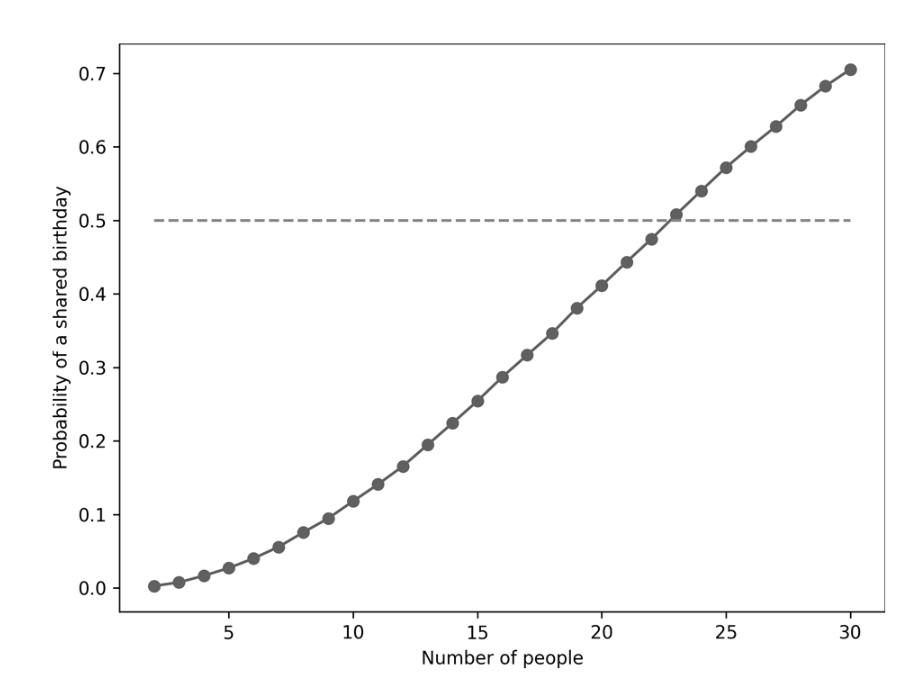

Siempre es satisfactorio ver cómo la simulación coincide con las matemáticas.